In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pprint import pprint
original_image = plt.imread('imagen_muestra.png')
print("Dimensiones imagen original: {}".format(original_image.shape))
original_image = original_image[:,:,0]

Dimensiones imagen original: (1001, 1419, 3)


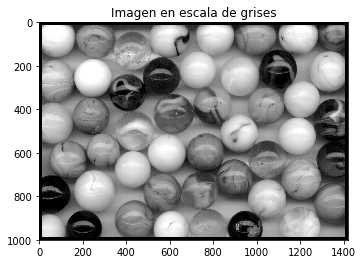

In [10]:
plt.imshow(original_image, cmap='gray')
plt.title('Imagen en escala de grises')
plt.show()

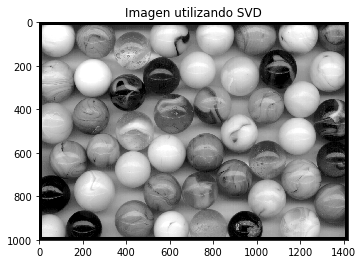

In [11]:
U,S,V_T = np.linalg.svd(original_image, full_matrices=False)
img_svd = (U*S)@V_T
plt.imshow(img_svd, cmap='gray')
plt.title('Imagen utilizando SVD')
plt.show()

### Ejemplo usando sólo usando 1 vector singular izquierdo, derecho y 1 valor singular

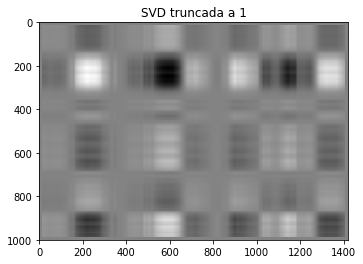

In [12]:
img_svd_1=np.outer((U[:,1]*S[1]),V_T[1,:])
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')
plt.show()

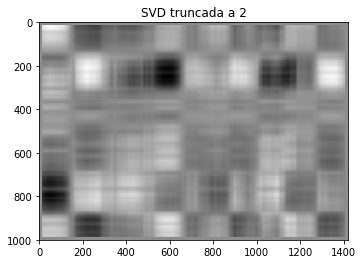

In [17]:
img_svd_2=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:])
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')
plt.show()

## Ejercicio: Reconstruir usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares
---

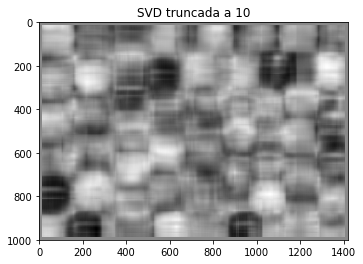

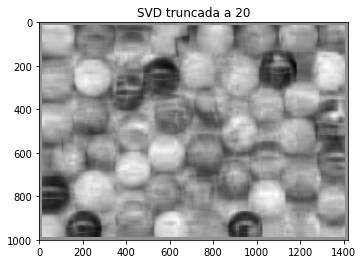

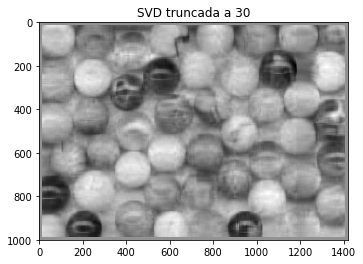

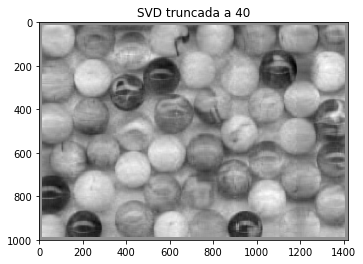

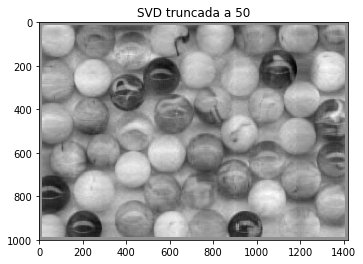

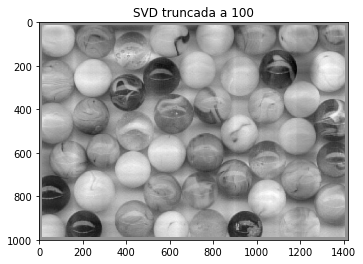

In [42]:
#Esta función es recursiva... No sé si esto es lo óptimo o si de plano conviene iterar.
    
def reconstruir_imagen_con_n(n, i=1, img=0):
    if i == n:
        return img
    else:
        return img + reconstruir_imagen_con_n_vec_sing(n, i+1,np.outer((U[:,i]*S[i]),V_T[i,:]))

#solución iterable (Con loops)
def reconstruir_imagen_con_n_loop(n, img=0):
    for i in range(1,n+1):
        img += np.outer((U[:,i]*S[i]),V_T[i,:])
    return img

    
def mostrar_imagen_con_n_vec_sing(n):
    plt.imshow(reconstruir_imagen_con_n(n), cmap='gray')
    plt.title('SVD truncada a {}'.format(n))
    plt.show()


mostrar_imagen_con_n_vec_sing(10)
mostrar_imagen_con_n_vec_sing(20)
mostrar_imagen_con_n_vec_sing(30)
mostrar_imagen_con_n_vec_sing(40)
mostrar_imagen_con_n_vec_sing(50)
mostrar_imagen_con_n_vec_sing(100)